In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

In [2]:
datafile = 'ETH-USD.csv'
data = pd.read_csv(datafile, index_col = 'Date')
data.index = pd.to_datetime(data.index)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-13,3492.753662,3607.741699,3417.602051,3606.201660,3606.201660,16211275589
2021-10-14,3604.958984,3819.258545,3590.275146,3786.014160,3786.014160,19443499909
2021-10-15,3790.154297,3895.466309,3735.363525,3862.634766,3862.634766,20966841512
2021-10-16,3865.666504,3962.453125,3805.885986,3830.382080,3830.382080,16578095629
2021-10-17,3829.858887,3914.897949,3660.723389,3847.104492,3847.104492,15908090346
...,...,...,...,...,...,...
2022-10-09,1315.460205,1327.668823,1309.344604,1322.604248,1322.604248,5486230123
2022-10-10,1322.618652,1335.662720,1291.337646,1291.337646,1291.337646,8794491050
2022-10-11,1291.109619,1296.273926,1272.737671,1279.575684,1279.575684,9274845260


In [3]:
df = data.copy()
sma_span = 50
ema_span = 20
df['sma50'] = df['Adj Close'].rolling(sma_span).mean()
df['ema20'] = df['Adj Close'].ewm(span=ema_span).mean()
df.round(3)

,Open,High,Low,Close,Adj Close,Volume,sma50,ema20
Date,,,,,,,,
2021-10-13,3492.754,3607.742,3417.602,3606.202,3606.202,16211275589,NaN,3606.202
2021-10-14,3604.959,3819.259,3590.275,3786.014,3786.014,19443499909,NaN,3700.603
2021-10-15,3790.154,3895.466,3735.364,3862.635,3862.635,20966841512,NaN,3760.100
2021-10-16,3865.667,3962.453,3805.886,3830.382,3830.382,16578095629,NaN,3780.390
2021-10-17,3829.859,3914.898,3660.723,3847.104,3847.104,15908090346,NaN,3796.527
...,...,...,...,...,...,...,...,...
2022-10-09,1315.460,1327.669,1309.345,1322.604,1322.604,5486230123,1475.875,1357.551
2022-10-10,1322.619,1335.663,1291.338,1291.338,1291.338,8794491050,1469.315,1351.245
2022-10-11,1291.110,1296.274,1272.738,1279.576,1279.576,9274845260,1462.457,1344.419


In [4]:
df.dropna(inplace = True)
df.round(3)

,Open,High,Low,Close,Adj Close,Volume,sma50,ema20
Date,,,,,,,,
2021-12-01,4623.680,4780.732,4530.272,4586.990,4586.990,27634826695,4284.094,4365.159
2021-12-02,4586.333,4628.920,4441.508,4511.302,4511.302,21502671027,4302.196,4379.163
2021-12-03,4514.356,4647.289,4100.146,4220.706,4220.706,25879591528,4310.890,4363.988
2021-12-04,4227.762,4242.726,3525.494,4119.587,4119.587,38478999182,4316.029,4340.596
2021-12-05,4119.629,4246.923,4040.218,4198.323,4198.323,25533062707,4323.388,4326.985
...,...,...,...,...,...,...,...,...
2022-10-09,1315.460,1327.669,1309.345,1322.604,1322.604,5486230123,1475.875,1357.551
2022-10-10,1322.619,1335.663,1291.338,1291.338,1291.338,8794491050,1469.315,1351.245
2022-10-11,1291.110,1296.274,1272.738,1279.576,1279.576,9274845260,1462.457,1344.419


In [5]:
def plot_system1(data):
    df = data.copy()
    dates = df.index
    price = df['Adj Close']
    sma50 = df['sma50']
    ema20 = df['ema20']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize = (14,7))
        plt.plot(dates, price, linewidth = 1.5, label = 'CPB price - Daily Adj Close')
        plt.plot(dates, sma50, linewidth = 2, label = '50 SMA')
        plt.plot(dates, ema20, linewidth = 2, label = '20 EMA')
        plt.title ("A Simple Crossover System")
        plt.ylabel('Price($)')
        plt.legend()
        
    plt.show()
        

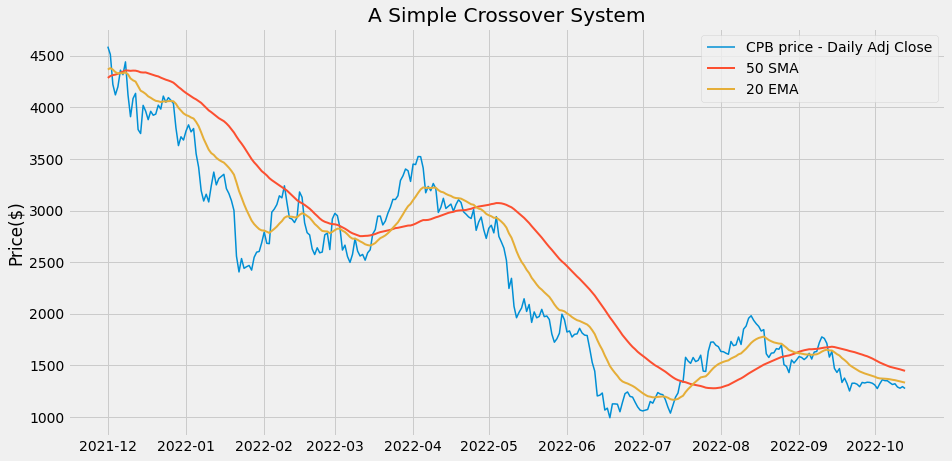

In [6]:
plot_system1(df)

In [7]:
long_positions = np.where(df['ema20'] > df['sma50'], 1, 0)
df['Position'] = long_positions

df.round(3)

,Open,High,Low,Close,Adj Close,Volume,sma50,ema20,Position
Date,,,,,,,,,
2021-12-01,4623.680,4780.732,4530.272,4586.990,4586.990,27634826695,4284.094,4365.159,1
2021-12-02,4586.333,4628.920,4441.508,4511.302,4511.302,21502671027,4302.196,4379.163,1
2021-12-03,4514.356,4647.289,4100.146,4220.706,4220.706,25879591528,4310.890,4363.988,1
2021-12-04,4227.762,4242.726,3525.494,4119.587,4119.587,38478999182,4316.029,4340.596,1
2021-12-05,4119.629,4246.923,4040.218,4198.323,4198.323,25533062707,4323.388,4326.985,1
...,...,...,...,...,...,...,...,...,...
2022-10-09,1315.460,1327.669,1309.345,1322.604,1322.604,5486230123,1475.875,1357.551,0
2022-10-10,1322.619,1335.663,1291.338,1291.338,1291.338,8794491050,1469.315,1351.245,0
2022-10-11,1291.110,1296.274,1272.738,1279.576,1279.576,9274845260,1462.457,1344.419,0


In [8]:
buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
df.loc[buy_signals].round(3)

,Open,High,Low,Close,Adj Close,Volume,sma50,ema20,Position
Date,,,,,,,,,
2022-03-24,3031.061,3118.388,3012.327,3108.062,3108.062,18070503166,2821.076,2832.579,1
2022-07-21,1520.375,1595.762,1472.185,1576.750,1576.750,20009556587,1315.226,1321.319,1


In [9]:
buy_signals_prev = (df['Position'].shift(-1) == 1) & (df['Position'] == 0)
df.loc[buy_signals | buy_signals_prev].round(3)

,Open,High,Low,Close,Adj Close,Volume,sma50,ema20,Position
Date,,,,,,,,,
2022-03-23,2973.145,3036.752,2933.307,3031.067,3031.067,16008767658,2812.572,2803.580,0
2022-03-24,3031.061,3118.388,3012.327,3108.062,3108.062,18070503166,2821.076,2832.579,1
2022-07-20,1542.954,1612.646,1500.803,1520.201,1520.201,22942708340,1320.162,1294.432,0
2022-07-21,1520.375,1595.762,1472.185,1576.750,1576.750,20009556587,1315.226,1321.319,1


In [10]:
def plot_system1_sig(data):
    df = data.copy()
    dates = df.index
    price = df['Adj Close']
    sma50 = df['sma50']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma50 * buy_signals - (sma50.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma50 * sell_signals + (sma50.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        plt.plot(dates, sma50, linewidth=2, label='50 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title("A Simple Crossover System with Signals")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show()

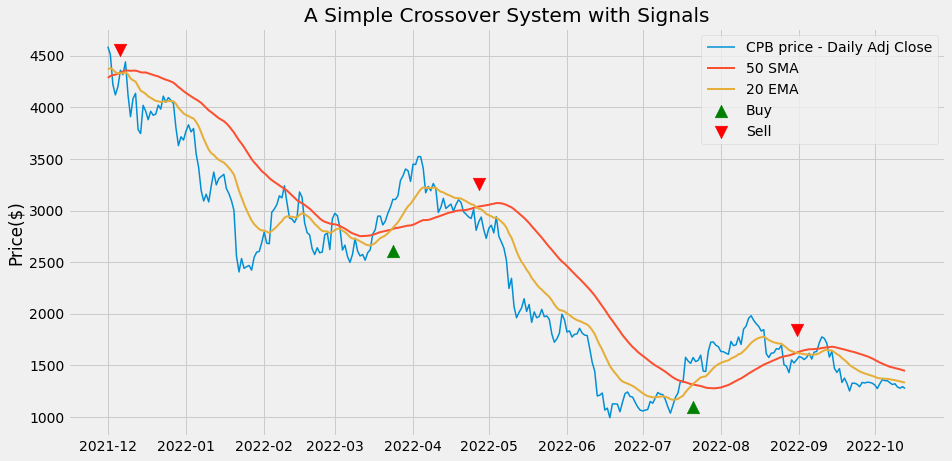

In [11]:
plot_system1_sig(df)

In [12]:
df['Hold'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
df['Strategy'] = df['Position'].shift(1) * df['Hold']
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,sma50,ema20,Position,Hold,Strategy
Date,,,,,,,,,,,
2021-12-02,4586.333008,4628.919922,4441.507813,4511.302246,4511.302246,21502671027,4302.195806,4379.162695,1,-0.016638,-0.016638
2021-12-03,4514.355957,4647.289063,4100.145508,4220.706055,4220.706055,25879591528,4310.889644,4363.988238,1,-0.066583,-0.066583
2021-12-04,4227.762207,4242.725586,3525.494141,4119.587402,4119.587402,38478999182,4316.028696,4340.595717,1,-0.024249,-0.024249
2021-12-05,4119.628906,4246.923340,4040.217529,4198.322754,4198.322754,25533062707,4323.387510,4326.984712,1,0.018932,0.018932
2021-12-06,4199.000000,4375.520508,3930.806641,4358.737305,4358.737305,28229518513,4333.620166,4330.021121,0,0.037497,0.037497
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-09,1315.460205,1327.668823,1309.344604,1322.604248,1322.604248,5486230123,1475.875061,1357.550767,0,0.005386,0.000000
2022-10-10,1322.618652,1335.662720,1291.337646,1291.337646,1291.337646,8794491050,1469.315435,1351.244756,0,-0.023924,-0.000000
2022-10-11,1291.109619,1296.273926,1272.737671,1279.575684,1279.575684,9274845260,1462.456831,1344.419130,0,-0.009150,-0.000000


In [13]:
returns = np.exp(df[['Hold', 'Strategy']].sum()) - 1
print(f"Buy and hold return: {round(returns['Hold']*100,2)}%")
print(f"Strategy return: {round(returns['Strategy']*100,2)}%")

Buy and hold return: -72.17%
Strategy return: -12.97%


In [14]:
n_days = len(df)
ann_returns = 252 / n_days * returns
print(f"Buy and hold annualized return: {round(ann_returns['Hold']*100,2)}%")
print(f"Strategy annualized return:{round(ann_returns['Strategy']*100,2)}%")

Buy and hold annualized return: -57.55%
Strategy annualized return:-10.34%


In [15]:
df.to_csv('Latest Result Cryptocurrency.csv', index = False)